In [38]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import pearsonr, ttest_ind
import sys
sys.path.append("..")
from dataset import get_loaders

In [63]:
ctx_order = 'first'
ctx_order_str = 'ctxF'

In [64]:
with open('../../results/test_seq_%s_results_rnn.P' %(ctx_order_str), 'rb') as f:
    results = pickle.load(f)
print(results.keys())
# test_seq_ctxF_results_rnn.P
# with open('../../results/test_seq_results.P', 'rb') as f:
#     results = pickle.load(f)
# print(results.keys())

dict_keys(['test_seq_results', 'dist_results'])


In [65]:
test_seq_results = results['test_seq_results'] # [n_trials, time_steps]: [384, 3]
ctx0_accs = test_seq_results['ctx0_accs']
ctx1_accs = test_seq_results['ctx1_accs']
ctx0_accs.shape


(20, 21, 4)

In [66]:
print('Accuracy at t=1 (face1) contex 0:', np.mean(ctx0_accs[:,-1,:], axis=0))
print('Accuracy at t=1 (face1) contex 1:', np.mean(ctx1_accs[:,-1,:], axis=0))

Accuracy at t=1 (face1) contex 0: [0.1        0.41666667 0.49166667 0.175     ]
Accuracy at t=1 (face1) contex 1: [0.1        0.41666667 0.50833333 0.3625    ]


In [67]:
val = ctx0_accs[:,:,fg]
print(val.shape)

(20, 21)


ipykernel_launcher:27: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_inchecs" which is no longer supported as of 3.3 and will become an error two minor releases later


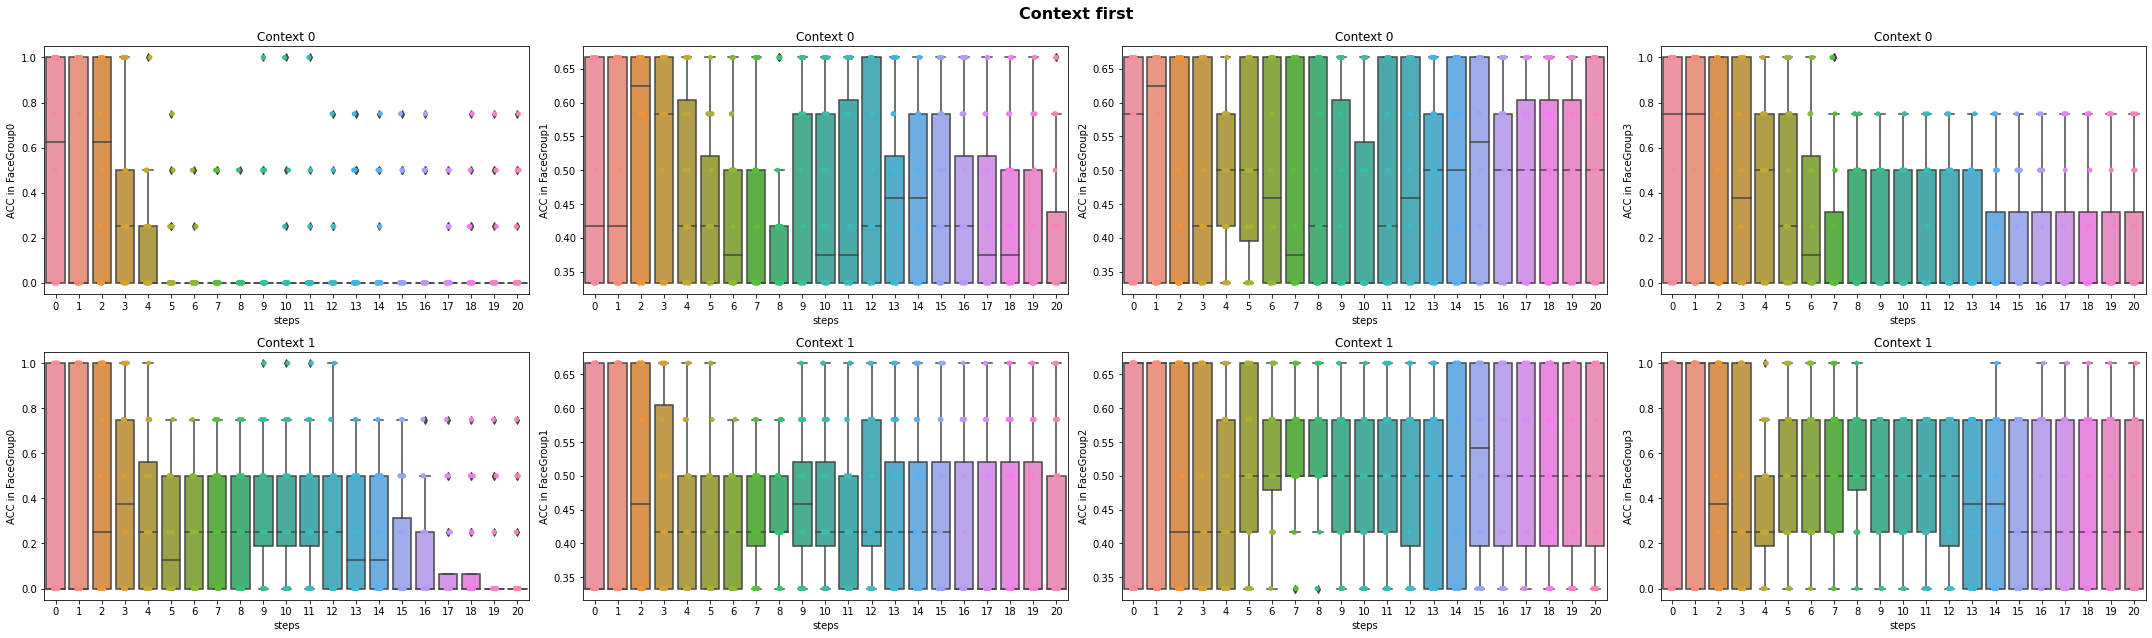

In [68]:
runs, checkpoints, f_grp = ctx0_accs.shape
fig, axs = plt.subplots(2, f_grp, figsize=(30,9))

for fg in range(f_grp):
    for ctx in range(2):
        if ctx==0:
            val = ctx0_accs[:,:,fg]
            title = 'Context 0'
            ax_ind = 0
        elif ctx==1:
            val = ctx1_accs[:,:,fg]
            title = 'Context 1'
            ax_ind = 1
        df = pd.DataFrame(val, columns=np.arange(checkpoints))
        df.insert(0, 'runs', np.arange(runs))
        val_name = 'ACC in FaceGroup%s' %(fg)
        df2 = pd.melt(df, id_vars=['runs'], var_name='steps', value_name=val_name)
        # plot
        ax = axs[ax_ind][fg]
        sns.boxplot(x='steps',y=val_name, data=df2, ax=ax)
        sns.stripplot(x='steps', y=val_name, data=df2, ax=ax)
        ax.set_title(title)
fig.suptitle('Context %s' %(ctx_order), fontsize=16, fontweight='bold')
plt.tight_layout()
fig_str = '%s_test_seq_results_rnn' %(ctx_order_str)
fig.savefig(('../../figures/'+fig_str+'.pdf'), 
            bbox_inchecs = 'tight', pad_inches=0)

Axis first
- Accuracy at t=1 (face1) contex 0: [0.1  0.417  0.492  0.175]
- Accuracy at t=1 (face1) contex 1: [0.1  0.417  0.51   0.3625]


Axis last
- Accuracy at t=1 (face1) contex 0: [0.08   0.39   0.598  0.393]
- Accuracy at t=1 (face1) contex 1: [0.283  0.443  0.618  0.64]